In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
import matplotlib
import matplotlib.cm as cm
from matplotlib import colors
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Compute normalized coverage distribution of H3K79me2 and H3K36me3 on the 5' and 3' end of the protein coding genes in mESC and NPC48h

- Extract genomic features of protein coding genes:
    - TSS +3kb
    - TES -3kb
- Compute counts of H3K79me2 and H3K36me3 on appropriate features in mESC and NPC48h and aggregate replicates;
- Normalize coverge on background regions using RLE;
- Plot nomralized coverage distribution for the two cell types

In [2]:
%%bash

### EXTRACT GENOMIC REGIONS OF INTEREST ###

extract_from_gtf.py -f TSS TES -w gene -b_tss 0 -a_tss 3000 -b_tes 3000 -a_tes 0 -prot_cod \
/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf

mv TSS.bed ../INTERMEDIATE_FILES/TSS_pl3kb_corplot.bed
mv TES.bed ../INTERMEDIATE_FILES/TES_min3kb_corplot.bed

Namespace(AFTER_GENE=0, AFTER_TES=0, AFTER_TSS=3000, BEFORE_GENE=0, BEFORE_TES=3000, BEFORE_TSS=0, FEATURE=['TSS', 'TES'], PROTEIN_CODING=True, from_what='gene', gtf_file='/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf', out_dir='./', verbose=False)


In [3]:
%%bash 

### COMPUTE COUNTS  FOR H3K36me3 on 3' end ###

multiBamSummary BED-file \
-b /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep1_H3K36me3_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep2_H3K36me3_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep1_H3K36me3_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep2_H3K36me3_merged.filtered.bam \
-o ../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.mat.gz \
--BED ../INTERMEDIATE_FILES/TES_min3kb_corplot.bed \
-bl /home/ferrari/ferrari/my_repository/blacklist_ChIP-Seq/GRCm38_General_readAttractingRegions.UseThisOne_DKFZ.bed \
-p 20 --outRawCounts ../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.counts -e --minMappingQuality 3

Number of bins found: 21965


In [4]:
%%bash 

### COMPUTE COUNTS  FOR H3K79me2 on 5' end ###

multiBamSummary BED-file \
-b /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep1_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep2_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep1_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep2_H3K79me2_merged.filtered.bam \
-o ../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.mat.gz \
--BED ../INTERMEDIATE_FILES/TSS_pl3kb_corplot.bed \
-bl /home/ferrari/ferrari/my_repository/blacklist_ChIP-Seq/GRCm38_General_readAttractingRegions.UseThisOne_DKFZ.bed \
-p 20 --outRawCounts ../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.counts -e --minMappingQuality 3

Number of bins found: 21965


/home/ferrari/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDep

H3K79me2_mESC      0.904801
H3K79me2_NPC48h    1.105215
dtype: float64


/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/package/anaconda3/bin/ipython:43: RuntimeWarning: divide by zero encountered in log
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be remove

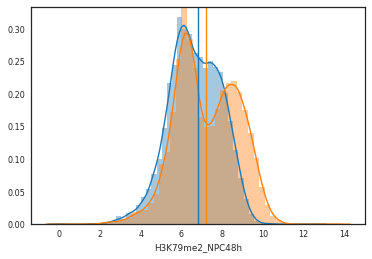

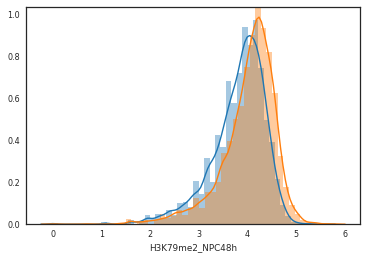

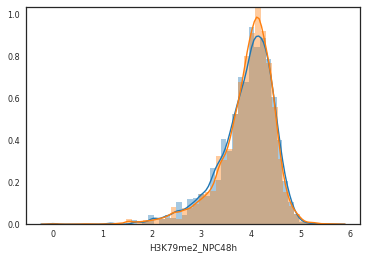

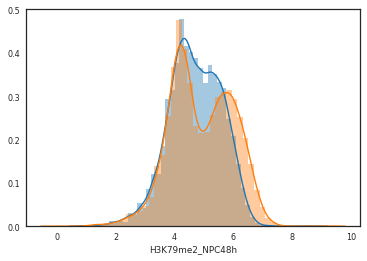

In [2]:
### NORMALIZE H3K79me2 ON BACKGROUND REGIONS ###

plt.figure()
k79 = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.counts", sep="\t")
k79 = rel.preprocess_deeptools(k79, merge_rep=True, list_of_columns=[[0,1],[2,3]], log=True)
k79.columns = ["H3K79me2_mESC","H3K79me2_NPC48h"]
sns.distplot(k79.H3K79me2_mESC)
sns.distplot(k79.H3K79me2_NPC48h)
plt.axvline(6.8)
plt.axvline(7.2, color="darkorange")


plt.figure()
k79_index = k79.loc[k79.sum(axis=1)<13].index
k79 = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.counts", sep="\t")
k79 = rel.preprocess_deeptools(k79, merge_rep=True, list_of_columns=[[0,1],[2,3]], log=False)
k79.columns = ["H3K79me2_mESC","H3K79me2_NPC48h"]
sns.distplot(np.log(k79.H3K79me2_mESC.loc[k79_index]+1))
sns.distplot(np.log(k79.H3K79me2_NPC48h.loc[k79_index]+1))


SF_k79 = rel.RLE(k79.loc[k79_index])[0]
print(SF_k79)


plt.figure()
k79 = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.counts", sep="\t")
k79 = rel.preprocess_deeptools(k79, merge_rep=True, list_of_columns=[[0,1],[2,3]], log=False)
k79.columns = ["H3K79me2_mESC","H3K79me2_NPC48h"]
k79 = k79.divide(SF_k79, axis = "columns")
sns.distplot(np.log(k79.H3K79me2_mESC.loc[k79_index]+1))
sns.distplot(np.log(k79.H3K79me2_NPC48h.loc[k79_index]+1))



plt.figure()
k79 = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.counts", sep="\t")
k79 = rel.filter_counts(k79, rowsum = 10)
k79 = rel.preprocess_deeptools(k79, merge_rep=True, list_of_columns=[[0,1],[2,3]])
k79.columns = ["H3K79me2_mESC","H3K79me2_NPC48h"]
k79 = k79.divide(SF_k79, axis = "columns")
#k79 = rel.RLE(k79)[1]
k79 = np.log(k79).replace([np.inf,-np.inf],np.nan).dropna()
sns.distplot(k79.H3K79me2_mESC)
sns.distplot(k79.H3K79me2_NPC48h)

/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local

H3K36me3_mESC      1.471960
H3K36me3_NPC48h    0.679366
dtype: float64


/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/package/anaconda3/bin/ipython:43: RuntimeWarning: divide by zero encountered in log
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


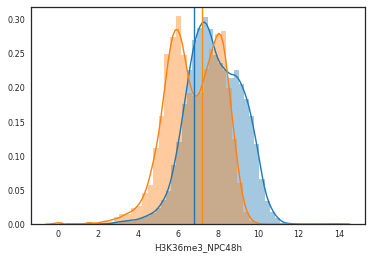

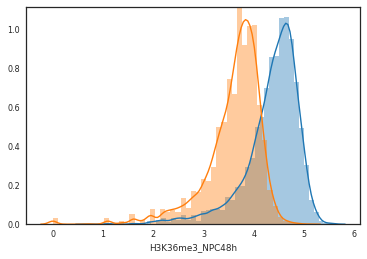

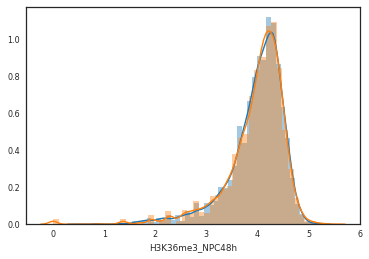

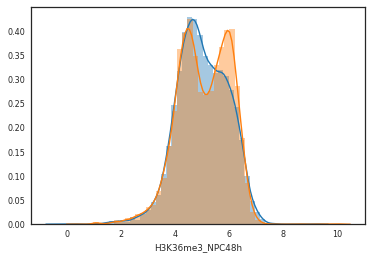

In [3]:
### NORMALIZE H3K36me3 ON BACKGROUND REGIONS ###

plt.figure()
k36 = pd.read_csv("../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.counts", sep="\t")
k36 = rel.preprocess_deeptools(k36, merge_rep=True, list_of_columns=[[0,1],[2,3]], log=True)
k36.columns = ["H3K36me3_mESC","H3K36me3_NPC48h"]
sns.distplot(k36.H3K36me3_mESC)
sns.distplot(k36.H3K36me3_NPC48h)
plt.axvline(6.8)
plt.axvline(7.2, color="darkorange")


plt.figure()
k36_index = k36.loc[k36.sum(axis=1)<13].index
k36 = pd.read_csv("../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.counts", sep="\t")
k36 = rel.preprocess_deeptools(k36, merge_rep=True, list_of_columns=[[0,1],[2,3]], log=False)
k36.columns = ["H3K36me3_mESC","H3K36me3_NPC48h"]
sns.distplot(np.log(k36.H3K36me3_mESC.loc[k36_index]+1))
sns.distplot(np.log(k36.H3K36me3_NPC48h.loc[k36_index]+1))


SF_k36 = rel.RLE(k36.loc[k36_index])[0]
print(SF_k36)


plt.figure()
k36 = pd.read_csv("../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.counts", sep="\t")
k36 = rel.preprocess_deeptools(k36, merge_rep=True, list_of_columns=[[0,1],[2,3]], log=False)
k36.columns = ["H3K36me3_mESC","H3K36me3_NPC48h"]
k36 = k36.divide(SF_k36, axis = "columns")
sns.distplot(np.log(k36.H3K36me3_mESC.loc[k36_index]+1))
sns.distplot(np.log(k36.H3K36me3_NPC48h.loc[k36_index]+1))



plt.figure()
k36 = pd.read_csv("../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.counts", sep="\t")
k36 = rel.filter_counts(k36, rowsum = 10)
k36 = rel.preprocess_deeptools(k36, merge_rep=True, list_of_columns=[[0,1],[2,3]])
k36.columns = ["H3K36me3_mESC","H3K36me3_NPC48h"]
k36 = k36.divide(SF_k36, axis = "columns")
#k79 = rel.RLE(k79)[1]
k36 = np.log(k36).replace([np.inf,-np.inf],np.nan).dropna()
sns.distplot(k36.H3K36me3_mESC)
sns.distplot(k36.H3K36me3_NPC48h)

In [4]:
### ASSIGN REGIONS TO GENES AND CREATE REFERENCE DATAFRAME ###

tr_tss = pd.read_csv("../INTERMEDIATE_FILES/TSS_pl3kb_corplot.bed", sep="\t",header=None, names=['chr','start','end','geneID','sc','strand','symbol'])
tr_tss["coord_ID"] = ['{}_{}_{}'.format(tr_tss["chr"][i],tr_tss["start"][i],tr_tss["end"][i]) for i in tr_tss.index]
tr_tss.index = tr_tss.coord_ID
tr_tss = tr_tss.geneID.to_dict()
tr_tss

tr_tes = pd.read_csv("../INTERMEDIATE_FILES/TES_min3kb_corplot.bed", sep="\t",header=None, names=['chr','start','end','geneID','sc','strand','symbol'])
tr_tes["coord_ID"] = ['{}_{}_{}'.format(tr_tes["chr"][i],tr_tes["start"][i],tr_tes["end"][i]) for i in tr_tes.index]
tr_tes.index = tr_tes.coord_ID
tr_tes = tr_tes.geneID.to_dict()
tr_tes

k79.index = [tr_tss[i] for i in k79.index]
k36.index = [tr_tes[i] for i in k36.index]

df_plot = k79.merge(k36,how='right',left_index=True, right_index=True)
df_plot = df_plot.replace([np.inf,-np.inf],np.nan)
df_plot = df_plot.dropna()
df_plot


,H3K79me2_mESC,H3K79me2_NPC48h,H3K36me3_mESC,H3K36me3_NPC48h
ENSMUSG00000000001.4,5.637374,6.291877,5.878706,6.313521
ENSMUSG00000000003.15,2.179482,2.384867,3.276967,3.382327
ENSMUSG00000000028.15,5.062885,5.460642,5.872987,5.306576
ENSMUSG00000000037.16,2.497935,3.510878,3.638757,4.236743
ENSMUSG00000000049.11,4.417528,5.011948,3.890071,4.620701
...,...,...,...,...
ENSMUSG00000116876.1,5.103986,4.834434,3.944138,3.718799
ENSMUSG00000116925.1,5.020021,4.505130,6.859060,6.380556
ENSMUSG00000116930.1,4.920322,6.054818,4.480940,4.215236
ENSMUSG00000116933.1,4.482067,4.294409,6.276538,6.484669


/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/ferrari/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


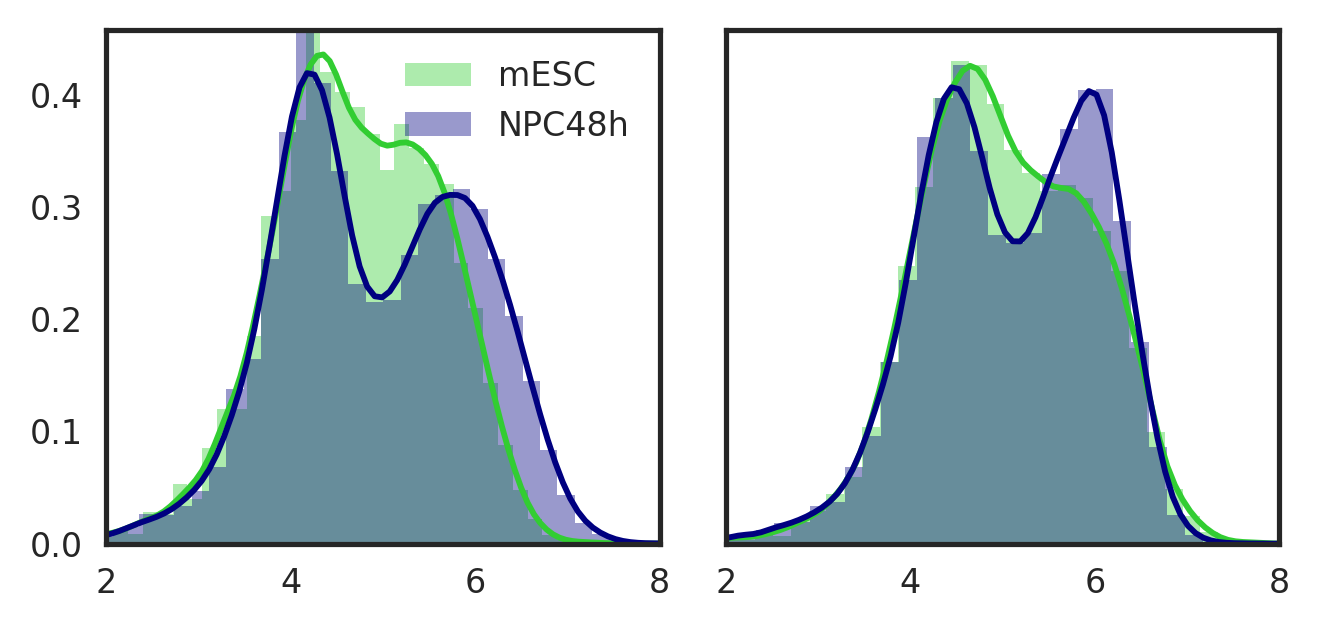

In [5]:
### PLOT NORMALIZED COVERAGE DISTRIBUTION ###

fig,ax = plt.subplots(1,2,dpi=300, figsize=(4.5,2.2), sharex=True, sharey=True)

sns.distplot(df_plot.H3K79me2_mESC.values, ax=ax[0], label = 'mESC', color='limegreen')
sns.distplot(df_plot.H3K79me2_NPC48h.values, ax=ax[0],  label = 'NPC48h', color='navy')
ax[0].legend()

sns.distplot(df_plot.H3K36me3_mESC.values, ax=ax[1], label = 'mESC', color='limegreen')
sns.distplot(df_plot.H3K36me3_NPC48h.values, ax=ax[1], label = 'NPC48h', color='navy')
ax[1].set_xlim((2,8))

plt.tight_layout()

plt.savefig("../FIGURES/H3K36me3_H3K79me2_hist_normBackground.png")